In [1]:
import os
import sys

# add path to sys
SRC_DIR = os.path.dirname(os.path.abspath('../../src'))
sys.path.append(SRC_DIR)

# import modules
import torch
import glob
from src import parse_args, Trainer
from src.models import *
from src.utils import *

In [2]:
# data path
pc_filename = '/media/shubham/GoldMine/datasets/KITTI/raw/2011_09_26/2011_09_26_drive_0009_sync/velodyne_points/data/0000000100.bin'
img_filename = '/media/shubham/GoldMine/datasets/KITTI/raw/2011_09_26/2011_09_26_drive_0009_sync/image_02/data/0000000100.png'

## Read Files

In [3]:
# read point-cloud
velo_pc = read_velo_bin(pc_filename)
# read image
img_rgb = cv2.cvtColor(cv2.imread(img_filename), cv2.COLOR_BGR2RGB)

## Load Model

In [4]:
exp_id = 'kitti_no_latent_concat'
concat_latent_vec = False

exp_str = 'vr3d.learning_rate_0.0001.n_xgrids_16.n_ygrids_16.xlim_0.0_70.0.ylim_-25.0_25.0.zlim_-2.5_1.0.max_depth_100.0.vol_size_256x256x16.img_size_512x256.dense_depth_True.concat_latent_vector_{}.exp_id_{}'.format(concat_latent_vec, exp_id)

# define model
obj_label_len = len(pose_fields) + len(label_map) # 9 for poses, rest for object classes
model = VR3Dense(in_channels=1, n_xgrids=16, n_ygrids=16, obj_label_len=obj_label_len, concat_latent_vector=concat_latent_vec).to('cuda')

# load weights
model = load_pretrained_weights(model, '../../models', exp_str)

# define trainer
trainer = Trainer(dataroot=None, model=model, dataset=None, dense_depth=True,
                   n_xgrids=16, n_ygrids=16, epochs=None, batch_size=None, learning_rate=None, exp_str=exp_str,
                   xmin=0., xmax=70., ymin=-25., ymax=25., zmin=-2.5, zmax=1., max_depth=100., vol_size_x=256, 
                   vol_size_y=256, vol_size_z=16, img_size_x=512, img_size_y=256, loss_weights=None, mode='test')

Loaded pre-trained weights: ../../models/vr3d.learning_rate_0.0001.n_xgrids_16.n_ygrids_16.xlim_0.0_70.0.ylim_-25.0_25.0.zlim_-2.5_1.0.max_depth_100.0.vol_size_256x256x16.img_size_512x256.dense_depth_True.concat_latent_vector_False.exp_id_kitti_no_latent_concat/checkpoint_best.pt


## Display Prediction

In [5]:
# perform prediction
(label_dict, dense_depth), dt = trainer.predict(velo_pc, img_rgb)
print('Inference took {} milliseconds'.format(dt))
# predicted depth
dense_depth = cv2.resize(dense_depth, (img_rgb.shape[1], img_rgb.shape[0]), interpolation = cv2.INTER_NEAREST)
pred_kitti_no_latent_concat = colorize_depth_map(dense_depth)

Inference took 28.099 milliseconds


In [6]:
exp_id = 'kitti_no_latent_concat_add_l2'
concat_latent_vec = False

exp_str = 'vr3d.learning_rate_0.0001.n_xgrids_16.n_ygrids_16.xlim_0.0_70.0.ylim_-25.0_25.0.zlim_-2.5_1.0.max_depth_100.0.vol_size_256x256x16.img_size_512x256.dense_depth_True.concat_latent_vector_{}.exp_id_{}'.format(concat_latent_vec, exp_id)

# define model
obj_label_len = len(pose_fields) + len(label_map) # 9 for poses, rest for object classes
model = VR3Dense(in_channels=1, n_xgrids=16, n_ygrids=16, obj_label_len=obj_label_len, concat_latent_vector=concat_latent_vec).to('cuda')

# load weights
model = load_pretrained_weights(model, '../../models', exp_str)

# define trainer
trainer = Trainer(dataroot=None, model=model, dataset=None, dense_depth=True,
                   n_xgrids=16, n_ygrids=16, epochs=None, batch_size=None, learning_rate=None, exp_str=exp_str,
                   xmin=0., xmax=70., ymin=-25., ymax=25., zmin=-2.5, zmax=1., max_depth=100., vol_size_x=256, 
                   vol_size_y=256, vol_size_z=16, img_size_x=512, img_size_y=256, loss_weights=None, mode='test')

Loaded pre-trained weights: ../../models/vr3d.learning_rate_0.0001.n_xgrids_16.n_ygrids_16.xlim_0.0_70.0.ylim_-25.0_25.0.zlim_-2.5_1.0.max_depth_100.0.vol_size_256x256x16.img_size_512x256.dense_depth_True.concat_latent_vector_False.exp_id_kitti_no_latent_concat_add_l2/checkpoint_best.pt


In [7]:
# perform prediction
(label_dict, dense_depth), dt = trainer.predict(velo_pc, img_rgb)
print('Inference took {} milliseconds'.format(dt))
# predicted depth
dense_depth = cv2.resize(dense_depth, (img_rgb.shape[1], img_rgb.shape[0]), interpolation = cv2.INTER_NEAREST)
pred_kitti_no_latent_concat_add_l2 = colorize_depth_map(dense_depth)

Inference took 12.019 milliseconds


In [8]:
exp_id = 'kitti_no_latent_concat_add_l2_add_smooth'
concat_latent_vec = False

exp_str = 'vr3d.learning_rate_0.0001.n_xgrids_16.n_ygrids_16.xlim_0.0_70.0.ylim_-25.0_25.0.zlim_-2.5_1.0.max_depth_100.0.vol_size_256x256x16.img_size_512x256.dense_depth_True.concat_latent_vector_{}.exp_id_{}'.format(concat_latent_vec, exp_id)

# define model
obj_label_len = len(pose_fields) + len(label_map) # 9 for poses, rest for object classes
model = VR3Dense(in_channels=1, n_xgrids=16, n_ygrids=16, obj_label_len=obj_label_len, concat_latent_vector=concat_latent_vec).to('cuda')

# load weights
model = load_pretrained_weights(model, '../../models', exp_str)

# define trainer
trainer = Trainer(dataroot=None, model=model, dataset=None, dense_depth=True,
                   n_xgrids=16, n_ygrids=16, epochs=None, batch_size=None, learning_rate=None, exp_str=exp_str,
                   xmin=0., xmax=70., ymin=-25., ymax=25., zmin=-2.5, zmax=1., max_depth=100., vol_size_x=256, 
                   vol_size_y=256, vol_size_z=16, img_size_x=512, img_size_y=256, loss_weights=None, mode='test')

Loaded pre-trained weights: ../../models/vr3d.learning_rate_0.0001.n_xgrids_16.n_ygrids_16.xlim_0.0_70.0.ylim_-25.0_25.0.zlim_-2.5_1.0.max_depth_100.0.vol_size_256x256x16.img_size_512x256.dense_depth_True.concat_latent_vector_False.exp_id_kitti_no_latent_concat_add_l2_add_smooth/checkpoint_best.pt


In [9]:
# perform prediction
(label_dict, dense_depth), dt = trainer.predict(velo_pc, img_rgb)
print('Inference took {} milliseconds'.format(dt))
# predicted depth
dense_depth = cv2.resize(dense_depth, (img_rgb.shape[1], img_rgb.shape[0]), interpolation = cv2.INTER_NEAREST)
pred_kitti_no_latent_concat_add_l2_add_smooth = colorize_depth_map(dense_depth)

Inference took 7.739 milliseconds


In [10]:
exp_id = 'kitti_no_latent_concat_add_l2_add_edge_preserv_smooth'
concat_latent_vec = False

exp_str = 'vr3d.learning_rate_0.0001.n_xgrids_16.n_ygrids_16.xlim_0.0_70.0.ylim_-25.0_25.0.zlim_-2.5_1.0.max_depth_100.0.vol_size_256x256x16.img_size_512x256.dense_depth_True.concat_latent_vector_{}.exp_id_{}'.format(concat_latent_vec, exp_id)

# define model
obj_label_len = len(pose_fields) + len(label_map) # 9 for poses, rest for object classes
model = VR3Dense(in_channels=1, n_xgrids=16, n_ygrids=16, obj_label_len=obj_label_len, concat_latent_vector=concat_latent_vec).to('cuda')

# load weights
model = load_pretrained_weights(model, '../../models', exp_str)

# define trainer
trainer = Trainer(dataroot=None, model=model, dataset=None, dense_depth=True,
                   n_xgrids=16, n_ygrids=16, epochs=None, batch_size=None, learning_rate=None, exp_str=exp_str,
                   xmin=0., xmax=70., ymin=-25., ymax=25., zmin=-2.5, zmax=1., max_depth=100., vol_size_x=256, 
                   vol_size_y=256, vol_size_z=16, img_size_x=512, img_size_y=256, loss_weights=None, mode='test')

Loaded pre-trained weights: ../../models/vr3d.learning_rate_0.0001.n_xgrids_16.n_ygrids_16.xlim_0.0_70.0.ylim_-25.0_25.0.zlim_-2.5_1.0.max_depth_100.0.vol_size_256x256x16.img_size_512x256.dense_depth_True.concat_latent_vector_False.exp_id_kitti_no_latent_concat_add_l2_add_edge_preserv_smooth/checkpoint_best.pt


In [11]:
# perform prediction
(label_dict, dense_depth), dt = trainer.predict(velo_pc, img_rgb)
print('Inference took {} milliseconds'.format(dt))
# predicted depth
dense_depth = cv2.resize(dense_depth, (img_rgb.shape[1], img_rgb.shape[0]), interpolation = cv2.INTER_NEAREST)
pred_kitti_no_latent_concat_add_l2_add_edge_preserv_smooth = colorize_depth_map(dense_depth)

Inference took 7.894 milliseconds


In [12]:
exp_id = 'kitti_latent_concat_add_l2_add_edge_preserv_smooth'
concat_latent_vec = True

exp_str = 'vr3d.learning_rate_0.0001.n_xgrids_16.n_ygrids_16.xlim_0.0_70.0.ylim_-25.0_25.0.zlim_-2.5_1.0.max_depth_100.0.vol_size_256x256x16.img_size_512x256.dense_depth_True.concat_latent_vector_{}.exp_id_{}'.format(concat_latent_vec, exp_id)

# define model
obj_label_len = len(pose_fields) + len(label_map) # 9 for poses, rest for object classes
model = VR3Dense(in_channels=1, n_xgrids=16, n_ygrids=16, obj_label_len=obj_label_len, concat_latent_vector=concat_latent_vec).to('cuda')

# load weights
model = load_pretrained_weights(model, '../../models', exp_str)

# define trainer
trainer = Trainer(dataroot=None, model=model, dataset=None, dense_depth=True,
                   n_xgrids=16, n_ygrids=16, epochs=None, batch_size=None, learning_rate=None, exp_str=exp_str,
                   xmin=0., xmax=70., ymin=-25., ymax=25., zmin=-2.5, zmax=1., max_depth=100., vol_size_x=256, 
                   vol_size_y=256, vol_size_z=16, img_size_x=512, img_size_y=256, loss_weights=None, mode='test')

Loaded pre-trained weights: ../../models/vr3d.learning_rate_0.0001.n_xgrids_16.n_ygrids_16.xlim_0.0_70.0.ylim_-25.0_25.0.zlim_-2.5_1.0.max_depth_100.0.vol_size_256x256x16.img_size_512x256.dense_depth_True.concat_latent_vector_True.exp_id_kitti_latent_concat_add_l2_add_edge_preserv_smooth/checkpoint_best.pt


In [13]:
# perform prediction
(label_dict, dense_depth), dt = trainer.predict(velo_pc, img_rgb)
print('Inference took {} milliseconds'.format(dt))
# predicted depth
dense_depth = cv2.resize(dense_depth, (img_rgb.shape[1], img_rgb.shape[0]), interpolation = cv2.INTER_NEAREST)
pred_kitti_latent_concat_add_l2_add_edge_preserv_smooth = colorize_depth_map(dense_depth)

Inference took 7.634 milliseconds


In [14]:
exp_id = 'kitti'
concat_latent_vec = True

exp_str = 'vr3d.learning_rate_0.0001.n_xgrids_16.n_ygrids_16.xlim_0.0_70.0.ylim_-25.0_25.0.zlim_-2.5_1.0.max_depth_100.0.vol_size_256x256x16.img_size_512x256.dense_depth_True.concat_latent_vector_{}.exp_id_{}'.format(concat_latent_vec, exp_id)

# define model
obj_label_len = len(pose_fields) + len(label_map) # 9 for poses, rest for object classes
model = VR3Dense(in_channels=1, n_xgrids=16, n_ygrids=16, obj_label_len=obj_label_len, concat_latent_vector=concat_latent_vec).to('cuda')

# load weights
model = load_pretrained_weights(model, '../../models', exp_str)

# define trainer
trainer = Trainer(dataroot=None, model=model, dataset=None, dense_depth=True,
                   n_xgrids=16, n_ygrids=16, epochs=None, batch_size=None, learning_rate=None, exp_str=exp_str,
                   xmin=0., xmax=70., ymin=-25., ymax=25., zmin=-2.5, zmax=1., max_depth=100., vol_size_x=256, 
                   vol_size_y=256, vol_size_z=16, img_size_x=512, img_size_y=256, loss_weights=None, mode='test')

Loaded pre-trained weights: ../../models/vr3d.learning_rate_0.0001.n_xgrids_16.n_ygrids_16.xlim_0.0_70.0.ylim_-25.0_25.0.zlim_-2.5_1.0.max_depth_100.0.vol_size_256x256x16.img_size_512x256.dense_depth_True.concat_latent_vector_True.exp_id_kitti/checkpoint_best.pt


In [15]:
# perform prediction
(label_dict, dense_depth), dt = trainer.predict(velo_pc, img_rgb)
print('Inference took {} milliseconds'.format(dt))
# predicted depth
dense_depth = cv2.resize(dense_depth, (img_rgb.shape[1], img_rgb.shape[0]), interpolation = cv2.INTER_NEAREST)
pred_kitti = colorize_depth_map(dense_depth)

Inference took 7.39 milliseconds


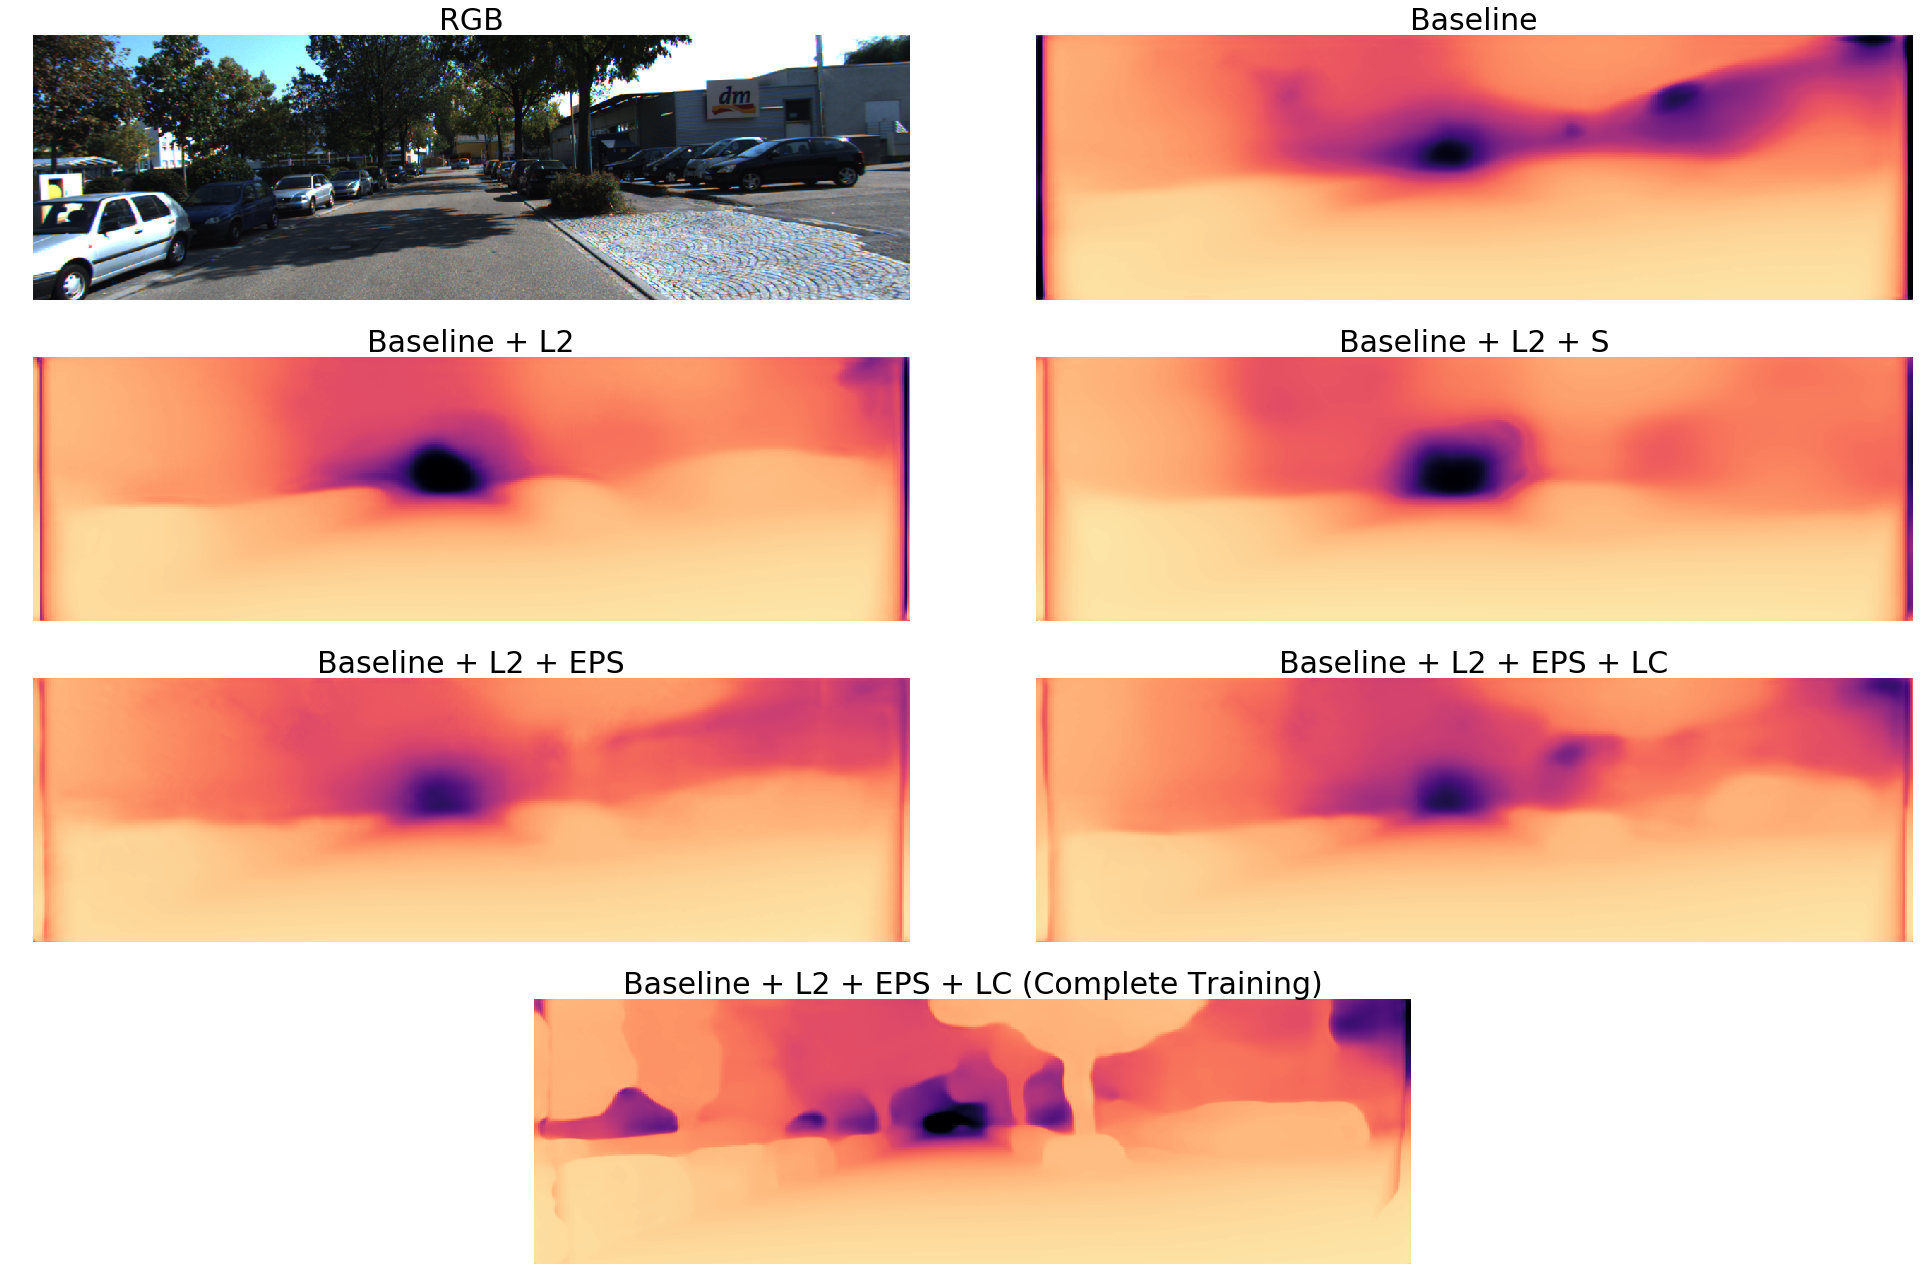

In [21]:
import matplotlib.pyplot as plt

plt.figure(figsize=(28,18))
plt.subplot(421)
plt.imshow(img_rgb)
plt.title('RGB', fontsize=30)
plt.axis('off')
plt.subplot(422)
plt.imshow(pred_kitti_no_latent_concat)
plt.title('Baseline', fontsize=30)
plt.axis('off')
plt.subplot(423)
plt.imshow(pred_kitti_no_latent_concat_add_l2)
plt.title('Baseline + L2', fontsize=30)
plt.axis('off')
plt.subplot(424)
plt.imshow(pred_kitti_no_latent_concat_add_l2_add_smooth)
plt.title('Baseline + L2 + S', fontsize=30)
plt.axis('off')
plt.subplot(425)
plt.imshow(pred_kitti_no_latent_concat_add_l2_add_edge_preserv_smooth)
plt.title('Baseline + L2 + EPS', fontsize=30)
plt.axis('off')
plt.subplot(426)
plt.imshow(pred_kitti_latent_concat_add_l2_add_edge_preserv_smooth)
plt.title('Baseline + L2 + EPS + LC', fontsize=30)
plt.axis('off')
plt.subplot(414)
plt.imshow(pred_kitti)
plt.title('Baseline + L2 + EPS + LC (Complete Training)', fontsize=30)
plt.axis('off')
plt.tight_layout()
plt.savefig('ablation.png')
plt.show()